# **Importing Libraries**

In [ ]:
import os
import warnings
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_fscore_support, classification_report



# **EXPLORATORY DATA ANALYSIS**

In [ ]:
# IMPORTING DATASET
df=pd.read_csv('lc.csv')
print(df)
print('============ Total number of columns====================')
print(df.columns)

    GENDER  AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
0        M   69        1               2        2              1   
1        M   74        2               1        1              1   
2        F   59        1               1        1              2   
3        M   63        2               2        2              1   
4        F   63        1               2        1              1   
..     ...  ...      ...             ...      ...            ...   
304      F   56        1               1        1              2   
305      M   70        2               1        1              1   
306      M   58        2               1        1              1   
307      M   67        2               1        2              1   
308      M   62        1               1        1              2   

     CHRONIC DISEASE  FATIGUE   ALLERGY   WHEEZING  ALCOHOL CONSUMING  \
0                  1         2         1         2                  2   
1                  2         2       

In [ ]:

print('============ Total number of columns====================')
print(df.columns)

============ Total number of columns====================
Index(['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG_CANCER'],
      dtype='object')


**DESCRIPTIVE STATISTICS**

In [ ]:

print('================================== DATA STATISTICS ==========================')
print(df.describe())



================================== DATA STATISTICS ==========================
              AGE     SMOKING  YELLOW_FINGERS     ANXIETY  PEER_PRESSURE  \
count  309.000000  309.000000      309.000000  309.000000     309.000000   
mean    62.673139    1.563107        1.569579    1.498382       1.501618   
std      8.210301    0.496806        0.495938    0.500808       0.500808   
min     21.000000    1.000000        1.000000    1.000000       1.000000   
25%     57.000000    1.000000        1.000000    1.000000       1.000000   
50%     62.000000    2.000000        2.000000    1.000000       2.000000   
75%     69.000000    2.000000        2.000000    2.000000       2.000000   
max     87.000000    2.000000        2.000000    2.000000       2.000000   

       CHRONIC DISEASE    FATIGUE     ALLERGY     WHEEZING  ALCOHOL CONSUMING  \
count       309.000000  309.000000  309.000000  309.000000         309.000000   
mean          1.504854    1.673139    1.556634    1.556634           1.5566

YES    270
NO      39
Name: LUNG_CANCER, dtype: int64


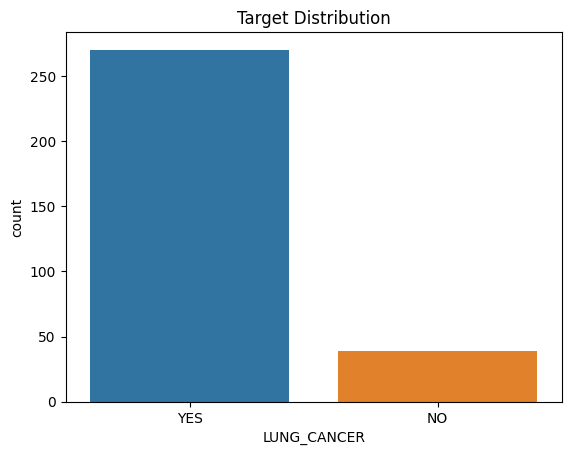

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
# target variable distribution
print(df.LUNG_CANCER.value_counts())
sns.countplot(x = df['LUNG_CANCER']);
plt.title("Target Distribution")
plt.show()

#**Checking Null Values**

In [ ]:
# checking for null values
df.isnull().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

#**Checking Categorical Features**

In [ ]:
df.select_dtypes(include=['object']).dtypes

GENDER         object
LUNG_CANCER    object
dtype: object

#**Converting Categorical Feature Diagnosis**

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
# Encode labels in column 'species'.
df['LUNG_CANCER']= label_encoder.fit_transform(df['LUNG_CANCER'])
df['GENDER']= label_encoder.fit_transform(df['GENDER'])


In [ ]:
bg= df[df['LUNG_CANCER']==1]

mg = df[df['LUNG_CANCER']==0]
print(bg.shape,mg.shape)

(270, 16) (39, 16)


#**Visualization of Features Distribution**

<ipython-input-11-2d5a492499ea>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])
<ipython-input-11-2d5a492499ea>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])
<ipython-input-11-2d5a492499ea>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in s

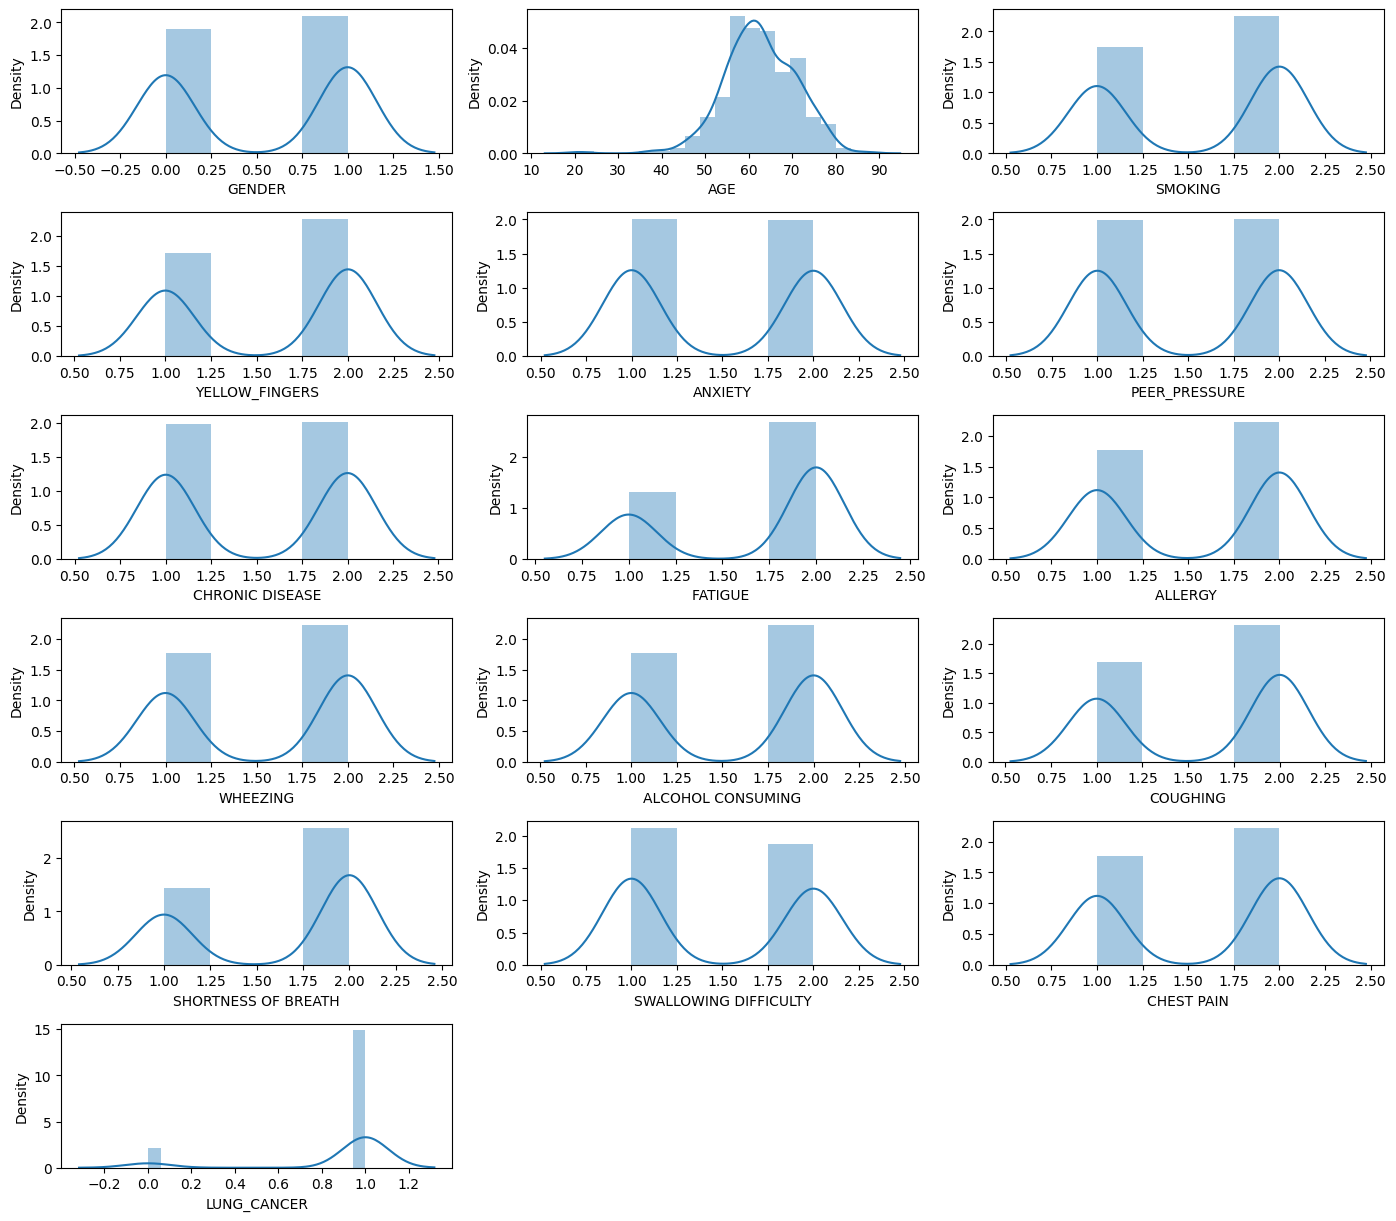

In [ ]:
plt.figure(figsize = (14, 20))
plotnumber = 1

for column in df:
    if plotnumber <= 30:
        ax = plt.subplot(10, 3, plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column)

    plotnumber += 1

plt.tight_layout()
plt.show()

#**Checking Features Correlation**

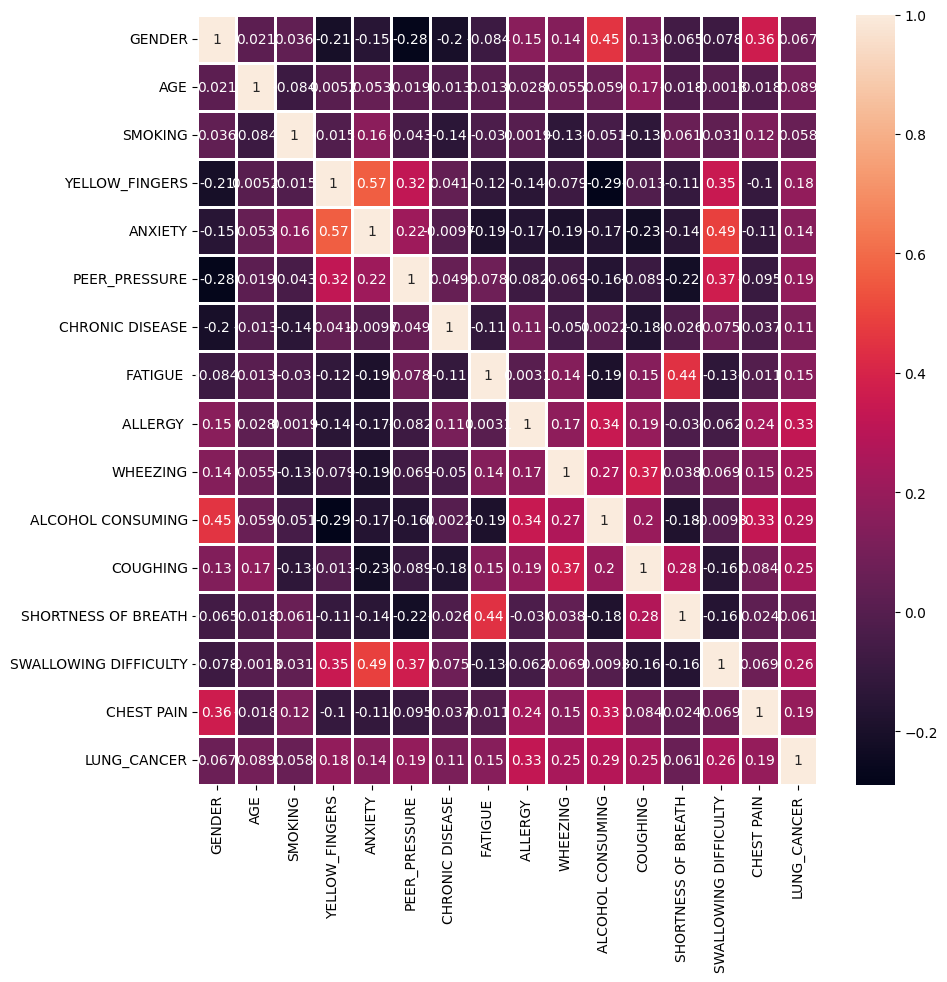

In [ ]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True , linewidths=1);

#**Feature Selection using Pearson Correlation**

In [ ]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = df.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [ ]:
corr_features = correlation(df, 0.55)
len(set(corr_features))

1

In [ ]:
corr_features


{'ANXIETY'}

In [ ]:
df.drop(corr_features,axis=1)
df.drop(corr_features,axis=1)

,GENDER,AGE,SMOKING,YELLOW_FINGERS,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,1,2,1,1,2,1,2,2,2,2,2,2,1
1,1,74,2,1,1,2,2,2,1,1,1,2,2,2,1
2,0,59,1,1,2,1,2,1,2,1,2,2,1,2,0
3,1,63,2,2,1,1,1,1,1,2,1,1,2,2,0
4,0,63,1,2,1,1,1,1,2,1,2,2,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,0,56,1,1,2,2,2,1,1,2,2,2,2,1,1
305,1,70,2,1,1,1,2,2,2,2,2,2,1,2,1
306,1,58,2,1,1,1,1,2,2,2,2,1,1,2,1
307,1,67,2,1,1,1,2,2,1,2,2,2,1,2,1


In [ ]:
y=df.pop('LUNG_CANCER')

# **HANDLING IMBALANCE DATASET**

In [ ]:
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import NearMiss

In [ ]:
# Implementing Oversampling for Handling Imbalanced
smk = SMOTETomek(random_state=42)
xdata,ydata=smk.fit_resample(df,y)

In [ ]:
xdata.shape,ydata.shape

((530, 15), (530,))

In [ ]:
from collections import Counter
print('Original dataset shape {}'.format(Counter(xdata)))
print('Resampled dataset shape {}'.format(Counter(ydata)))

Original dataset shape Counter({'GENDER': 1, 'AGE': 1, 'SMOKING': 1, 'YELLOW_FINGERS': 1, 'ANXIETY': 1, 'PEER_PRESSURE': 1, 'CHRONIC DISEASE': 1, 'FATIGUE ': 1, 'ALLERGY ': 1, 'WHEEZING': 1, 'ALCOHOL CONSUMING': 1, 'COUGHING': 1, 'SHORTNESS OF BREATH': 1, 'SWALLOWING DIFFICULTY': 1, 'CHEST PAIN': 1})
Resampled dataset shape Counter({1: 265, 0: 265})


#**Train Test Split**

In [ ]:
train_X, test_X, train_y, test_y = train_test_split(df,y, test_size=0.3)
print(train_X.shape)
print(test_X.shape)
print(train_y.shape)
print(test_y.shape)

(216, 15)
(93, 15)
(216,)
(93,)


#**Model Training**

In [ ]:
# implementing algorthm DT
from sklearn.svm import SVC
SVM = SVC()
ModelSVM = SVM.fit(train_X,train_y)

#**Model Testing**

In [ ]:
PredictionSVM = SVM.predict(test_X)

#**Training Accuracy**

In [ ]:
# =====================ACCUARACY===========================
print("=====================SVM Training Accuarcy=============")
tracSVM=SVM.score(train_X,train_y)
trainingAccSVM=tracSVM*100
print(trainingAccSVM)


=====================SVM Training Accuarcy=============
88.88888888888889


#**Testing Accuracy**

In [ ]:
from sklearn.metrics import accuracy_score,classification_report ,f1_-score
print("====================SVM Testing Accuracy============")
teacSVM=accuracy_score(test_y,PredictionSVM)
testingAccSVM=teacSVM*100
print(testingAccSVM)
from sklearn.metrics import confusion_matrix
print(classification_report(test_y, PredictionSVM))
confusion_matrix(test_y, PredictionSVM)

====================SVM Testing Accuracy============
83.87096774193549
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        15
           1       0.84      1.00      0.91        78

    accuracy                           0.84        93
   macro avg       0.42      0.50      0.46        93
weighted avg       0.70      0.84      0.77        93



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


array([[ 0, 15],
       [ 0, 78]])

In [ ]:
#Graphical Representation
import seaborn as sns
import matplotlib.pyplot as plt
# sns.pairplot(df)
# plt.show()